A[ pos="4.0,0.0!", shape = circle];

4.0 0.0
B[ pos="3.464101615137755,1.9999999999999998!", shape = circle];

3.464101615137755 1.9999999999999998
I[ pos="2.0000000000000004,3.4641016151377544!", shape = circle];

2.0000000000000004 3.4641016151377544
J[ pos="2.4492935982947064e-16,4.0!", shape = circle];

2.4492935982947064e-16 4.0
K[ pos="-1.9999999999999991,3.464101615137755!", shape = circle];

-1.9999999999999991 3.464101615137755
L[ pos="-3.464101615137754,2.0000000000000013!", shape = circle];

-3.464101615137754 2.0000000000000013
N[ pos="-4.0,4.898587196589413e-16!", shape = circle];

-4.0 4.898587196589413e-16
R[ pos="-3.4641016151377553,-1.999999999999999!", shape = circle];

-3.4641016151377553 -1.999999999999999
V[ pos="-2.0000000000000018,-3.464101615137754!", shape = circle];

-2.0000000000000018 -3.464101615137754
X[ pos="-7.347880794884119e-16,-4.0!", shape = circle];

-7.347880794884119e-16 -4.0
Y[ pos="1.9999999999999973,-3.464101615137756!", shape = circle];

1.999

<IPython.core.display.Javascript object>


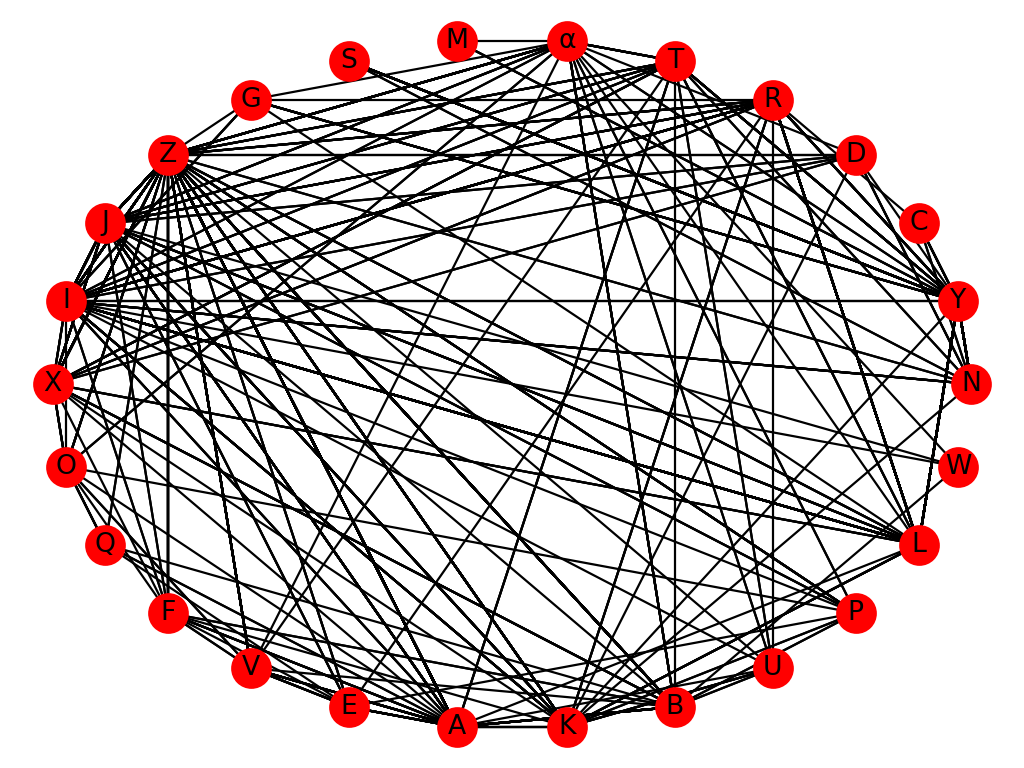

The average shortest path length is:
1.6892307692307693
The diameter is:
3
The radius is:
2
The eccentricities are:
{'N': 2, 'Y': 3, 'C': 3, 'D': 2, 'R': 2, 'T': 2, 'α': 2, 'M': 3, 'S': 3, 'G': 2, 'Z': 2, 'J': 3, 'I': 2, 'X': 3, 'O': 3, 'Q': 3, 'F': 3, 'V': 3, 'E': 3, 'A': 3, 'K': 2, 'B': 3, 'U': 3, 'P': 3, 'L': 2, 'W': 3}
The peripheries are:
['Y', 'C', 'M', 'S', 'J', 'X', 'O', 'Q', 'F', 'V', 'E', 'A', 'B', 'U', 'P', 'W']
The centers are:
['N', 'D', 'R', 'T', 'α', 'G', 'Z', 'I', 'K', 'L']
The degree centralities are:
{'N': 5.32, 'Y': 25.72, 'C': 0.32, 'D': 0.56, 'R': 2.8000000000000003, 'T': 1.76, 'α': 1.92, 'M': 0.16, 'S': 0.8, 'G': 0.64, 'Z': 22.56, 'J': 6.0, 'I': 5.5200000000000005, 'X': 3.2, 'O': 1.04, 'Q': 0.48, 'F': 1.28, 'V': 5.76, 'E': 2.08, 'A': 6.88, 'K': 2.64, 'B': 3.04, 'U': 0.56, 'P': 0.8, 'L': 12.64, 'W': 0.24}
The betweenness centralities are:
{'N': 0.04844708994708994, 'Y': 0.09711691086691089, 'C': 0.0006666666666666668, 'D': 0.006058441558441558, 'R': 0.0523704906204

In [14]:
import math
import xlrd # This module helps read data from Excel file
import networkx as nx
import numpy as np
import pandas as pd
import xlsxwriter # for writing data to Excel file

%matplotlib notebook


THRESHOLD_BASED_ON = 'nodes' # 'edges' or 'nodes'
THRESHOLD_VALUE = 30
MULTI_EDGE_DISPLAY = False 
Radius = 4

# read data from Excel file from local addres
loc = ("SW_13Oct.xlsx")
workbookToRead = xlrd.open_workbook(loc)

#get information of edges from the
def numberToLetter(num):
    if num == 27:
        return 'α' # α
    elif num >= 1 and num <= 26:
        return chr(num + 64)
        
def getEdge(startMinute):
    sheet = workbookToRead.sheet_by_index(0) #the index of sheet
    startVerticeNum = int(sheet.cell_value(startMinute, 1)) #(row, column) Python starts a list with 0
    endVerticeNum = int(sheet.cell_value(startMinute+1, 1)) 
    startVertice = numberToLetter(startVerticeNum)
    endVertice = numberToLetter(endVerticeNum)
    return (startVertice, endVertice) # Return the edge. Convert numbers to int, which looks better

# Instantiate the graph
G1 = nx.MultiGraph() # Allow self-loop

# add node/edge pairs
i = 0
while i < 1434: # exhaust the whole spreadsheet
    edge = getEdge(i)
    G1.add_edge(edge[0], edge[1])
    i += 1
#Write to dot file #########################################  
def addToDict(key, dict1):
    if key in dict1:
        dict1[key] += 1
    else:
        dict1[key] = 1

    
f = open("test.dot","w+")
f.write("digraph fig1 {\n")
f.write("	layout=neato\n")

#f.write("	A -> B;\n")
j = 0
listOfAddedEdges = []
listOfAddedNodes = []
dictOfEdges = {}
dictOfNodes = {}
edgeText = ""
while j < 1434: # exhaust the whole spreadsheet
    edge = getEdge(j)
    start = edge[0]
    end = edge[1]
    if THRESHOLD_BASED_ON == 'nodes':
        if j == 0:
            dictOfNodes[start] = 1
            dictOfNodes[end] = 1
        else:
            addToDict(end, dictOfNodes)
            if dictOfNodes[start] >= THRESHOLD_VALUE and dictOfNodes[end] >= THRESHOLD_VALUE:
                # generate edge text
                text = "	" + start + " -> " + end + " ;\n"
                # add to node list
                if not start in listOfAddedNodes:
                    listOfAddedNodes.append(start)
                if not end in listOfAddedNodes:
                    listOfAddedNodes.append(end)   
                # add edge
                if MULTI_EDGE_DISPLAY == True:    
                    edgeText += text
                elif MULTI_EDGE_DISPLAY == False:
                    if not text in listOfAddedEdges:
                        listOfAddedEdges.append(text)
                        edgeText += text    
    elif THRESHOLD_BASED_ON == 'edges':
        addToDict(edge, dictOfEdges)
        if dictOfEdges[edge] >= THRESHOLD_VALUE:
            # generate edge text 
            text = "	" + start + " -> " + end + " ;\n"
            # add to node list
            if not start in listOfAddedNodes:
                listOfAddedNodes.append(start)
            if not end in listOfAddedNodes:
                listOfAddedNodes.append(end)   
            # add edge
            if MULTI_EDGE_DISPLAY == True:    
                edgeText += text
            elif MULTI_EDGE_DISPLAY == False:
                if not text in listOfAddedEdges:
                    listOfAddedEdges.append(text)
                    edgeText += text
    j += 1
#generate a circle with fixed order############################
listOfAddedNodes.sort()
length = len(listOfAddedNodes)

pi = math.pi
n = length
unitAngle = 2 * pi / n
i = 0
while i < n:
    angle = i * unitAngle
    x = Radius * math.cos(angle)
    y = Radius * math.sin(angle)
    position = str(x) + "," + str(y) + "!"
    node = listOfAddedNodes[i]
    nodeText = node + "[ pos=" + '"' +position + '"' +", shape = circle];\n"
    f.write(nodeText) 
    print(nodeText)
    print(str(x), str(y))
    i += 1

print("Added nodes are:")
print(listOfAddedNodes)
print ("Length is:")
print(length)

f.write(edgeText)  
f.write("}")
f.close() 

#Write to dot file end#########################################  

#draw the network G1
nx.draw_circular(G1,with_labels=True)

#Print the measurments of the network
averageShortestPathLength = nx.average_shortest_path_length(G1)
print ("The average shortest path length is:")
print(averageShortestPathLength)

diameter = nx.diameter(G1)
print ("The diameter is:")
print(diameter)

radius = nx.radius(G1)
print ("The radius is:")
print(radius)

eccentricities = nx.eccentricity(G1)
print ("The eccentricities are:")
print(eccentricities)

peripheries = nx.periphery(G1)
print ("The peripheries are:")
print(peripheries)

centers = nx.center(G1)
print ("The centers are:")
print(centers)

dCentralities = nx.degree_centrality(G1) # a dictionary of centralities
#dCentralityMax = max(zip(dCentralities.values(), dCentralities.keys()))
print ("The degree centralities are:")
print (dCentralities)


bCntralities = nx.betweenness_centrality(G1) # a dictionary of centralities
#bCentralityMax = max(zip(bCntralities.values(), bCntralities.keys()))
print ("The betweenness centralities are:")
print (bCntralities)

cCntralities = nx.closeness_centrality(G1)
print ("The closeness centralities are:")
print (cCntralities)

NumNodesToRemove = nx.node_connectivity(G1)
print ("The number of nodes to be removed to disconnect this network:")
print (NumNodesToRemove)

nToRemove = nx.minimum_node_cut(G1)
print ("Which notes to be removed?")
print (nToRemove)

NumEdgesToRemove = nx.edge_connectivity(G1)
print ("The number of edges to be removed to disconnect this network:")
print (NumEdgesToRemove)

eToRemove = nx.minimum_edge_cut(G1)
print ("Which edges to be removed?")
print (eToRemove)

#Write results to Excel file

# Write a list to specific location
def writeListToExcel(listToWrite,startRow=0,startCol=0):
    row = startRow
    for i in listToWrite:
        worksheet.write(row, startCol, i)
        row += 1
        
# Write a dictinary to specific location
def writeDictToExcel(dictToWrite,startRow=0,startCol=0):
    row = startRow
    keyCol = startCol # This column shows the keys.
    valCol = startCol + 1 # This column shows the values. 
    for key, value in dictToWrite.items():
        worksheet.write(row, keyCol, key)
        worksheet.write(row, valCol, value)
        row += 1
        
# Write a tow-layer list which is used to specify a set of edges
def writeEdgeListToExcel(listToWrite,startRow=0,startCol=0):
    row = startRow
    tailCol = startCol # This column shows the tail nodes.
    headCol = startCol + 1 # This column shows the head nodes.
    for i in listToWrite:
        tailNode = i[0]
        headNode = i[1]
        worksheet.write(row, tailCol, tailNode)
        worksheet.write(row, headCol, headNode)
        row += 1

workbook = xlsxwriter.Workbook('Results.xlsx')
worksheet = workbook.add_worksheet('Overall')

worksheet.write('A1','Average Length')
worksheet.write('A2',averageShortestPathLength)

worksheet.write('B1','Diameter')
worksheet.write('B2',diameter)

worksheet.write('C1','Radius')
worksheet.write('C2',radius)

worksheet.write('D1','NumNodesRm')
worksheet.write('D2',NumNodesToRemove)

worksheet.write('E1','NodesToRm')
writeListToExcel(nToRemove, 1, 4)

worksheet.write('F1','NumEdgesRm')
worksheet.write('F2',NumEdgesToRemove)

worksheet.write('G1','EdgesToRm')
writeEdgeListToExcel(eToRemove, 1, 6)


#New sheet of eccentricities
worksheet = workbook.add_worksheet('Eccentricities')

worksheet.write('A1','Node')
worksheet.write('B1','Eccentricity')
writeDictToExcel(eccentricities, 1, 0)

worksheet.write('D1','Periphery')
writeListToExcel(peripheries, 1, 3)

worksheet.write('E1','Center')
writeListToExcel(centers, 1, 4)

#New sheet of centralities
worksheet = workbook.add_worksheet('Centralities')

worksheet.write('A1','Node')
worksheet.write('B1','Degree')
writeDictToExcel(dCentralities, 1, 0)

worksheet.write('D1','Node')
worksheet.write('E1','Betweenness')
writeDictToExcel(bCntralities, 1, 3)

worksheet.write('G1','Node')
worksheet.write('H1','Closeness')
writeDictToExcel(cCntralities, 1, 6)

#????
